C:\Users\rcfit\AppData\Local\Temp\ipykernel_6752\650579181.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='song_with_artist', y='danceability', data=top_songs, palette='viridis')


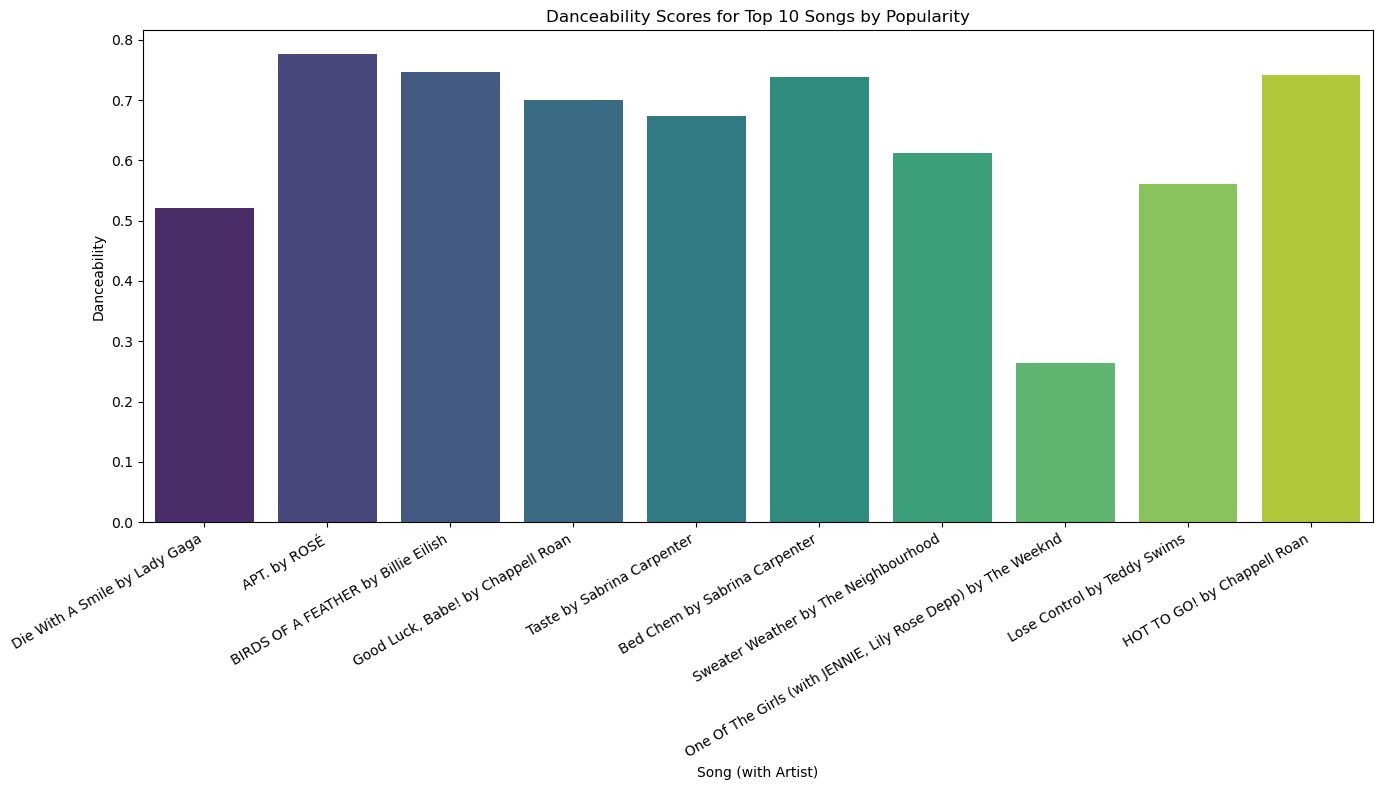

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
data['danceability'] = pd.to_numeric(data['danceability'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')

# Find the top 10 songs based on popularity score
top_songs = data.nlargest(10, 'popularity')

# Combine song title and artist for better visualization
top_songs['song_with_artist'] = top_songs['song'] + " by " + top_songs['artist']

# Plot danceability scores for the top 10 songs
plt.figure(figsize=(14, 8))
sns.barplot(x='song_with_artist', y='danceability', data=top_songs, palette='viridis')
plt.title("Danceability Scores for Top 10 Songs by Popularity")
plt.xlabel("Song (with Artist)")
plt.ylabel("Danceability")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


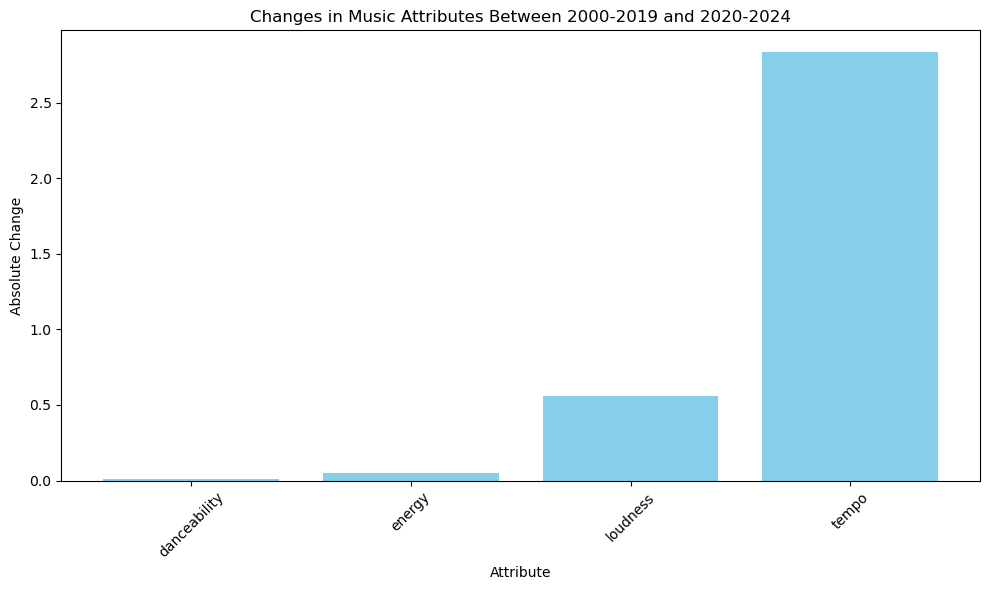

Changes in attributes between 2000-2019 and 2020-2024:
      Attribute    Change
3         tempo  2.836884
2      loudness  0.559321
1        energy  0.049796
0  danceability  0.008199


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'energy', 'loudness', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Calculate mean values for attributes in each period
mean_2000_2019 = data_2000_2019[attributes].mean()
mean_2020_2024 = data_2020_2024[attributes].mean()

# Calculate the absolute differences between the two periods
attribute_changes = (mean_2020_2024 - mean_2000_2019).abs()

# Prepare data for visualization
change_df = attribute_changes.reset_index()
change_df.columns = ['Attribute', 'Change']

# Plot the changes
plt.figure(figsize=(10, 6))
plt.bar(change_df['Attribute'], change_df['Change'], color='skyblue')
plt.title("Changes in Music Attributes Between 2000-2019 and 2020-2024")
plt.xlabel("Attribute")
plt.ylabel("Absolute Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the changes
print("Changes in attributes between 2000-2019 and 2020-2024:")
print(change_df.sort_values(by='Change', ascending=False))


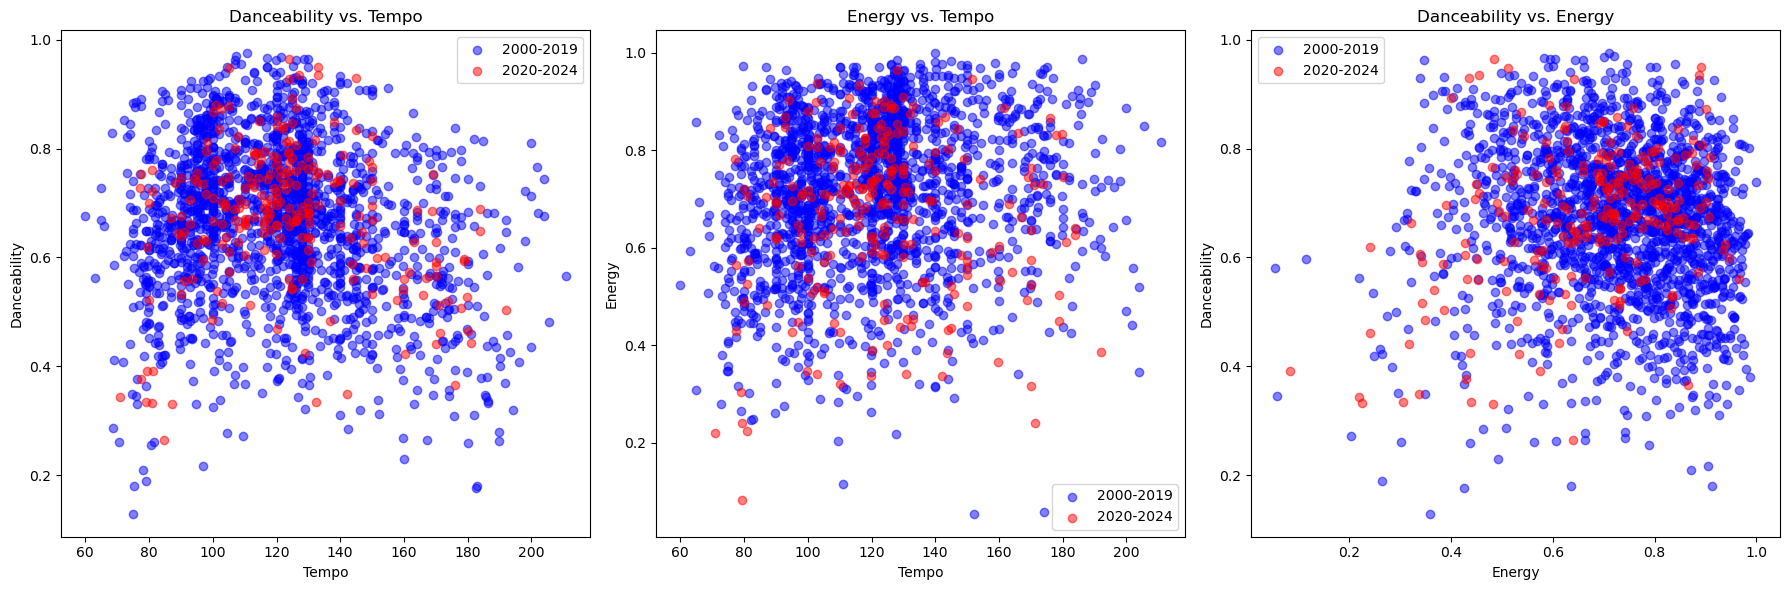

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'energy', 'loudness', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Scatterplots to compare attributes between 2000-2019 and 2020-2024
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot for Danceability vs. Tempo
axes[0].scatter(data_2000_2019['tempo'], data_2000_2019['danceability'], color='blue', label='2000-2019', alpha=0.5)
axes[0].scatter(data_2020_2024['tempo'], data_2020_2024['danceability'], color='red', label='2020-2024', alpha=0.5)
axes[0].set_title('Danceability vs. Tempo')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Danceability')
axes[0].legend()

# Scatterplot for Energy vs. Tempo
axes[1].scatter(data_2000_2019['tempo'], data_2000_2019['energy'], color='blue', label='2000-2019', alpha=0.5)
axes[1].scatter(data_2020_2024['tempo'], data_2020_2024['energy'], color='red', label='2020-2024', alpha=0.5)
axes[1].set_title('Energy vs. Tempo')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('Energy')
axes[1].legend()

# Scatterplot for Danceability vs. Energy
axes[2].scatter(data_2000_2019['energy'], data_2000_2019['danceability'], color='blue', label='2000-2019', alpha=0.5)
axes[2].scatter(data_2020_2024['energy'], data_2020_2024['danceability'], color='red', label='2020-2024', alpha=0.5)
axes[2].set_title('Danceability vs. Energy')
axes[2].set_xlabel('Energy')
axes[2].set_ylabel('Danceability')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()


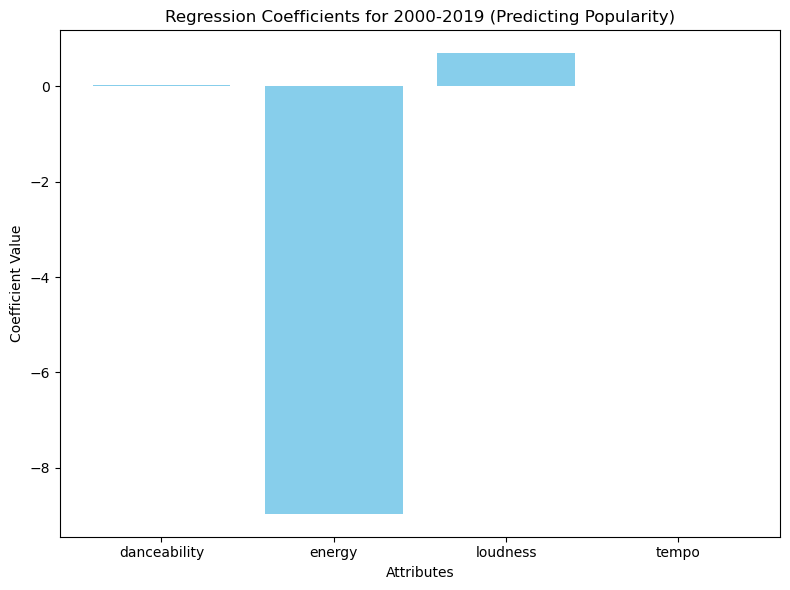

Coefficients for 2000-2019:
danceability: 0.0294
energy: -8.9633
loudness: 0.6922
tempo: 0.0116


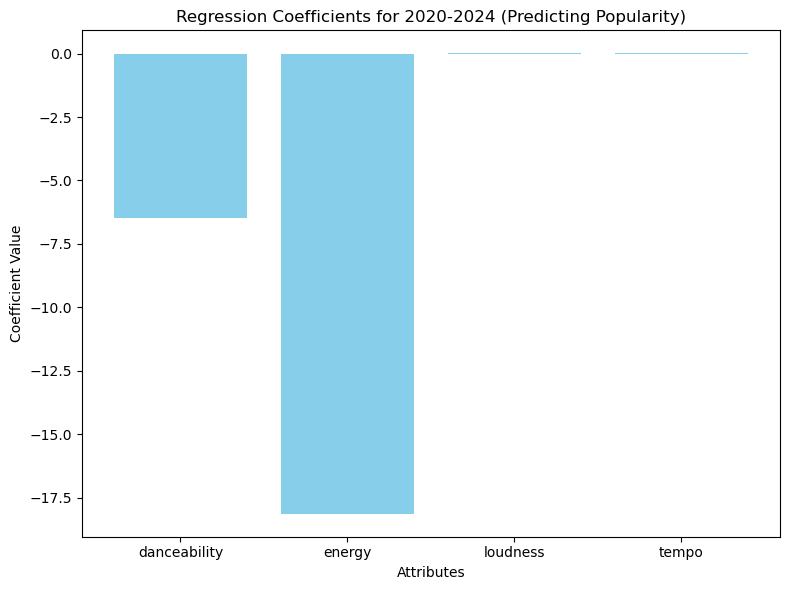

Coefficients for 2020-2024:
danceability: -6.4678
energy: -18.1376
loudness: 0.0060
tempo: 0.0100


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'energy', 'loudness', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Define the independent variables (attributes) and dependent variable (popularity)
independent_vars = ['danceability', 'energy', 'loudness', 'tempo']

# Function to calculate and plot the regression coefficients for each period
def plot_regression(data, period):
    X = data[independent_vars]
    y = data['popularity']

    # Linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Coefficients
    coeffs = model.coef_
    
    # Plotting the coefficients
    plt.figure(figsize=(8, 6))
    plt.bar(independent_vars, coeffs, color='skyblue')
    plt.title(f'Regression Coefficients for {period} (Predicting Popularity)')
    plt.xlabel('Attributes')
    plt.ylabel('Coefficient Value')
    plt.tight_layout()
    plt.show()
    
    # Print coefficients
    print(f"Coefficients for {period}:")
    for var, coeff in zip(independent_vars, coeffs):
        print(f"{var}: {coeff:.4f}")

# Plot regression coefficients for 2000-2019 period
plot_regression(data_2000_2019, '2000-2019')

# Plot regression coefficients for 2020-2024 period
plot_regression(data_2020_2024, '2020-2024')


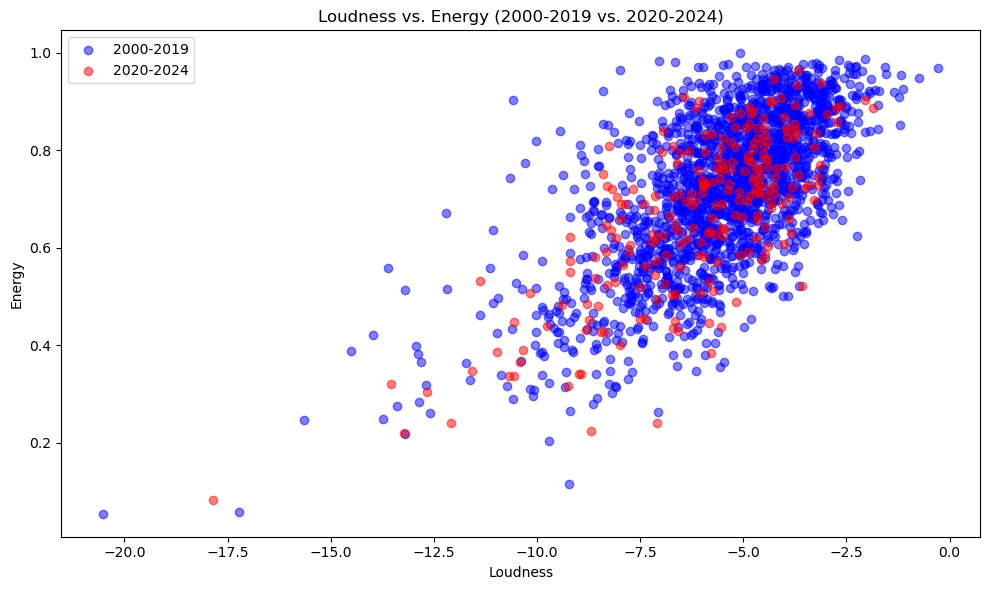


2000-2019 Descriptive Statistics:
Mean Loudness: -5.50
Mean Energy: 0.72
Median Loudness: -5.27
Median Energy: 0.74
Correlation between Loudness and Energy: 0.65

2020-2024 Descriptive Statistics:
Mean Loudness: -6.06
Mean Energy: 0.67
Median Loudness: -5.64
Median Energy: 0.71
Correlation between Loudness and Energy: 0.75


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'energy', 'loudness', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Scatterplot to compare loudness and energy for 2000-2019 and 2020-2024
plt.figure(figsize=(10, 6))

# Scatterplot for Loudness vs Energy
plt.scatter(data_2000_2019['loudness'], data_2000_2019['energy'], color='blue', label='2000-2019', alpha=0.5)
plt.scatter(data_2020_2024['loudness'], data_2020_2024['energy'], color='red', label='2020-2024', alpha=0.5)

# Adding titles and labels
plt.title('Loudness vs. Energy (2000-2019 vs. 2020-2024)')
plt.xlabel('Loudness')
plt.ylabel('Energy')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Descriptive statistics: Mean, Median, and Correlation for both periods
for period, period_data in zip(['2000-2019', '2020-2024'], [data_2000_2019, data_2020_2024]):
    print(f"\n{period} Descriptive Statistics:")
    print(f"Mean Loudness: {period_data['loudness'].mean():.2f}")
    print(f"Mean Energy: {period_data['energy'].mean():.2f}")
    print(f"Median Loudness: {period_data['loudness'].median():.2f}")
    print(f"Median Energy: {period_data['energy'].median():.2f}")
    print(f"Correlation between Loudness and Energy: {period_data[['loudness', 'energy']].corr().iloc[0, 1]:.2f}")


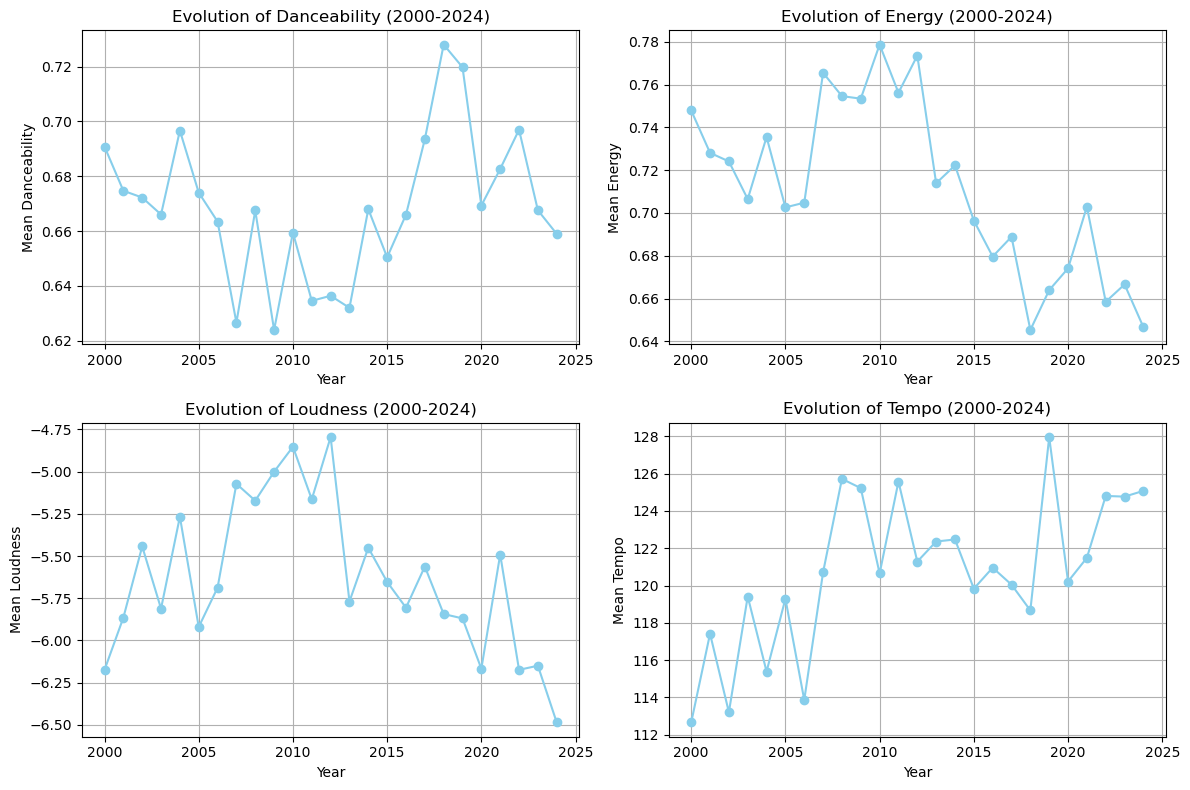

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'energy', 'loudness', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Filter the data for the years 2000 to 2024
data_filtered = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2024)]

# Calculate the mean for each attribute by year
mean_by_year = data_filtered.groupby('release_year')[attributes].mean().reset_index()

# Plot the evolution of attributes over time
plt.figure(figsize=(12, 8))

# Create subplots for each attribute
for i, attribute in enumerate(attributes, 1):
    plt.subplot(2, 2, i)
    plt.plot(mean_by_year['release_year'], mean_by_year[attribute], marker='o', label=attribute, color='skyblue')
    plt.title(f'Evolution of {attribute.capitalize()} (2000-2024)')
    plt.xlabel('Year')
    plt.ylabel(f'Mean {attribute.capitalize()}')
    plt.grid(True)
    plt.tight_layout()

# Display the plot
plt.tight_layout()
plt.show()


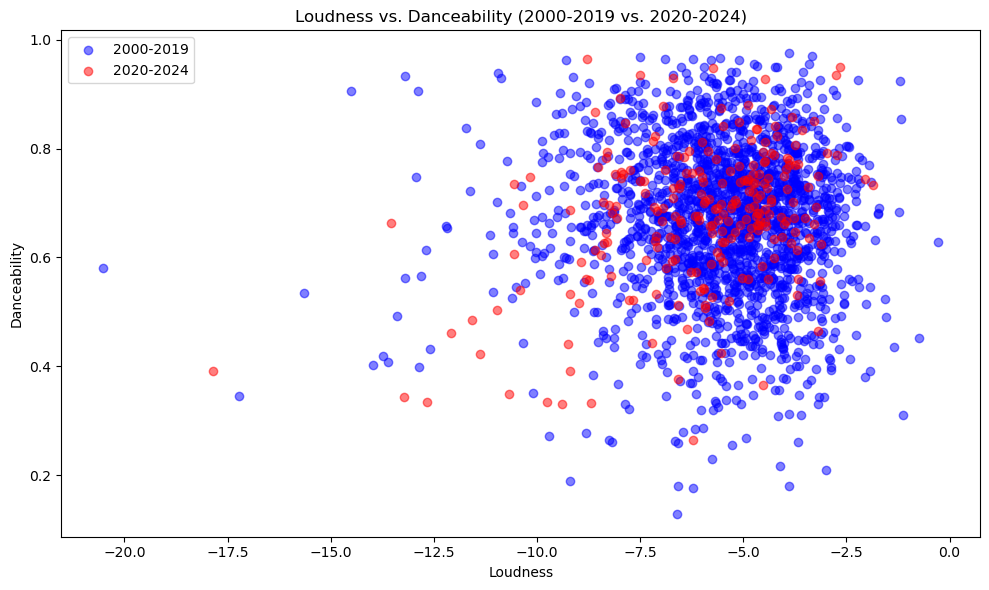

Correlation between Loudness and Danceability for 2000-2019: -0.04
Correlation between Loudness and Danceability for 2020-2024: 0.39


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'loudness']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Scatterplot to compare Loudness vs Danceability for both periods
plt.figure(figsize=(10, 6))

# Scatterplot for 2000-2019
plt.scatter(data_2000_2019['loudness'], data_2000_2019['danceability'], color='blue', label='2000-2019', alpha=0.5)
# Scatterplot for 2020-2024
plt.scatter(data_2020_2024['loudness'], data_2020_2024['danceability'], color='red', label='2020-2024', alpha=0.5)

# Adding titles and labels
plt.title('Loudness vs. Danceability (2000-2019 vs. 2020-2024)')
plt.xlabel('Loudness')
plt.ylabel('Danceability')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Descriptive statistics: Correlation between loudness and danceability for both periods
for period, period_data in zip(['2000-2019', '2020-2024'], [data_2000_2019, data_2020_2024]):
    correlation = period_data[['loudness', 'danceability']].corr().iloc[0, 1]
    print(f"Correlation between Loudness and Danceability for {period}: {correlation:.2f}")


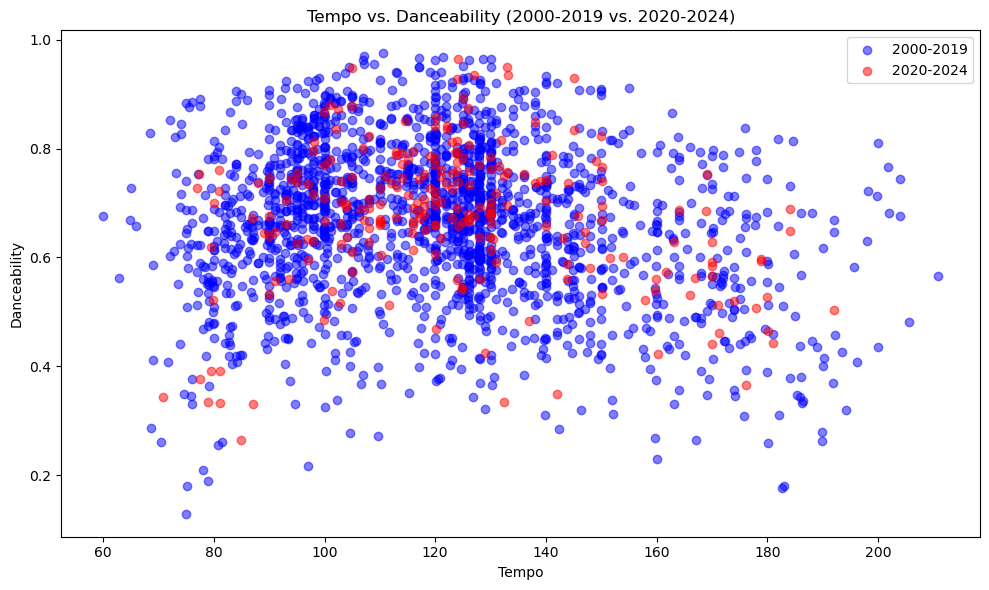

Correlation between Tempo and Danceability for 2000-2019: -0.17
Correlation between Tempo and Danceability for 2020-2024: -0.11


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['danceability', 'tempo']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Scatterplot to compare Tempo vs Danceability for both periods
plt.figure(figsize=(10, 6))

# Scatterplot for 2000-2019
plt.scatter(data_2000_2019['tempo'], data_2000_2019['danceability'], color='blue', label='2000-2019', alpha=0.5)
# Scatterplot for 2020-2024
plt.scatter(data_2020_2024['tempo'], data_2020_2024['danceability'], color='red', label='2020-2024', alpha=0.5)

# Adding titles and labels
plt.title('Tempo vs. Danceability (2000-2019 vs. 2020-2024)')
plt.xlabel('Tempo')
plt.ylabel('Danceability')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Descriptive statistics: Correlation between Tempo and Danceability for both periods
for period, period_data in zip(['2000-2019', '2020-2024'], [data_2000_2019, data_2020_2024]):
    correlation = period_data[['tempo', 'danceability']].corr().iloc[0, 1]
    print(f"Correlation between Tempo and Danceability for {period}: {correlation:.2f}")


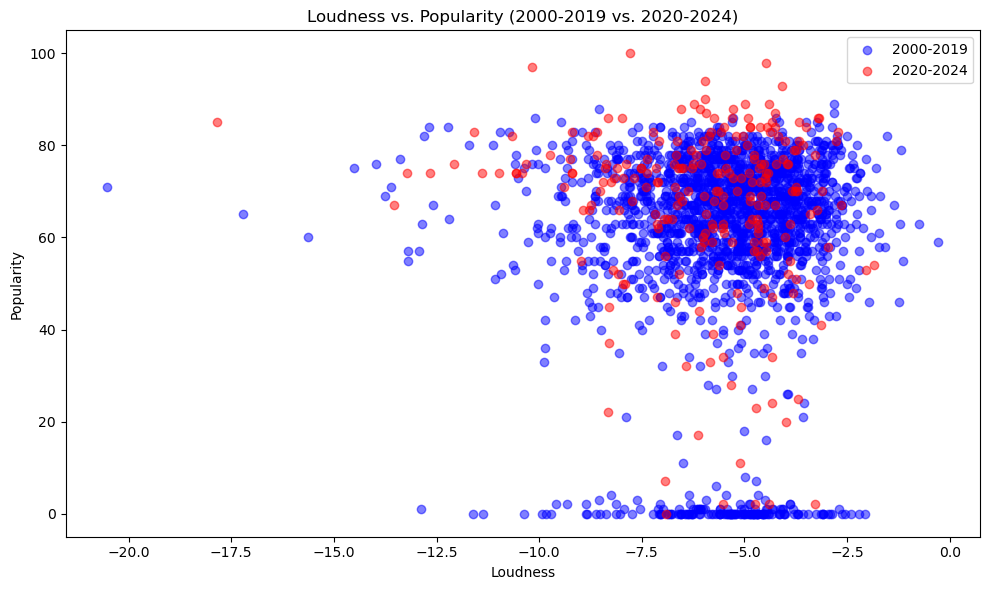

Correlation between Loudness and Popularity for 2000-2019: 0.02
Correlation between Loudness and Popularity for 2020-2024: -0.13


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('combined_songs.csv')

# Ensure data types are appropriate
attributes = ['popularity', 'loudness']
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Separate data into two time periods: 2000-2019 and 2020-2024
data_2000_2019 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]
data_2020_2024 = data[(data['release_year'] >= 2020) & (data['release_year'] <= 2024)]

# Scatterplot to compare Loudness vs Popularity for both periods
plt.figure(figsize=(10, 6))

# Scatterplot for 2000-2019
plt.scatter(data_2000_2019['loudness'], data_2000_2019['popularity'], color='blue', label='2000-2019', alpha=0.5)
# Scatterplot for 2020-2024
plt.scatter(data_2020_2024['loudness'], data_2020_2024['popularity'], color='red', label='2020-2024', alpha=0.5)

# Adding titles and labels
plt.title('Loudness vs. Popularity (2000-2019 vs. 2020-2024)')
plt.xlabel('Loudness')
plt.ylabel('Popularity')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Descriptive statistics: Correlation between Loudness and Popularity for both periods
for period, period_data in zip(['2000-2019', '2020-2024'], [data_2000_2019, data_2020_2024]):
    correlation = period_data[['loudness', 'popularity']].corr().iloc[0, 1]
    print(f"Correlation between Loudness and Popularity for {period}: {correlation:.2f}")


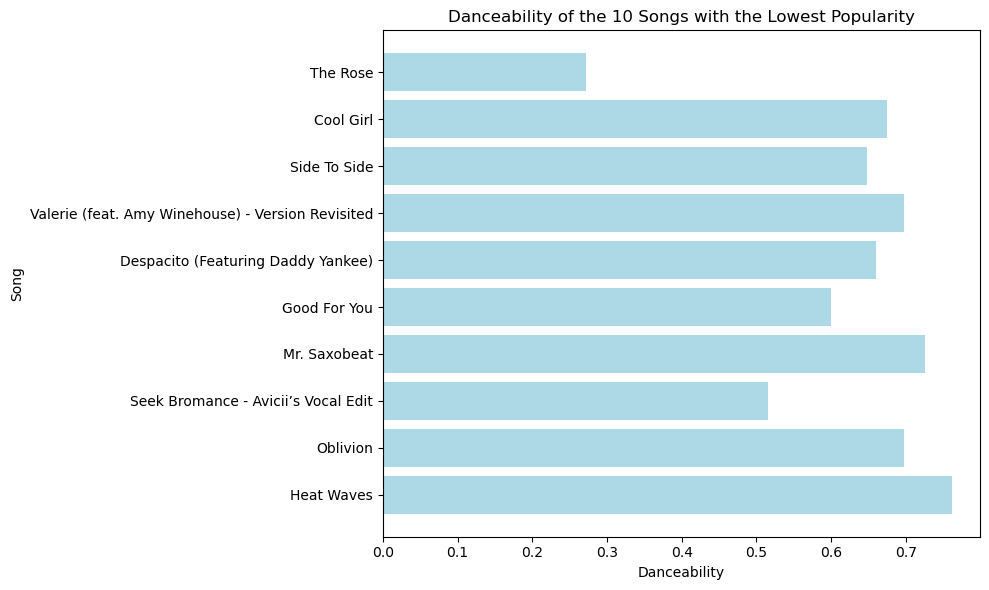

In [10]:
# Sort the dataset by popularity to get the songs with the lowest popularity
lowest_popularity_songs = data.sort_values(by='popularity').head(10)

# Select relevant columns (song name and danceability)
lowest_popularity_songs_comparison = lowest_popularity_songs[['song', 'danceability']]

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.barh(lowest_popularity_songs_comparison['song'], lowest_popularity_songs_comparison['danceability'], color='lightblue')

# Add labels and title
plt.xlabel('Danceability')
plt.ylabel('Song')
plt.title('Danceability of the 10 Songs with the Lowest Popularity')

# Display the plot
plt.tight_layout()
plt.show()


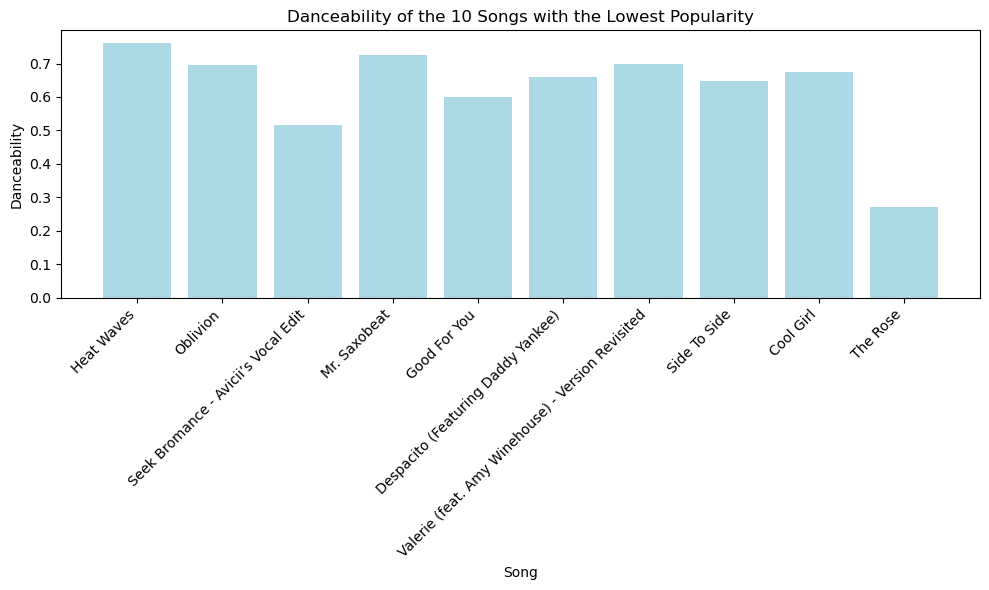

In [11]:
# Sort the dataset by popularity to get the songs with the lowest popularity
lowest_popularity_songs = data.sort_values(by='popularity').head(10)

# Select relevant columns (song name and danceability)
lowest_popularity_songs_comparison = lowest_popularity_songs[['song', 'danceability']]

# Plotting the comparison (swapping axes for vertical bar chart)
plt.figure(figsize=(10, 6))
plt.bar(lowest_popularity_songs_comparison['song'], lowest_popularity_songs_comparison['danceability'], color='lightblue')

# Add labels and title
plt.xlabel('Song')
plt.ylabel('Danceability')
plt.title('Danceability of the 10 Songs with the Lowest Popularity')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


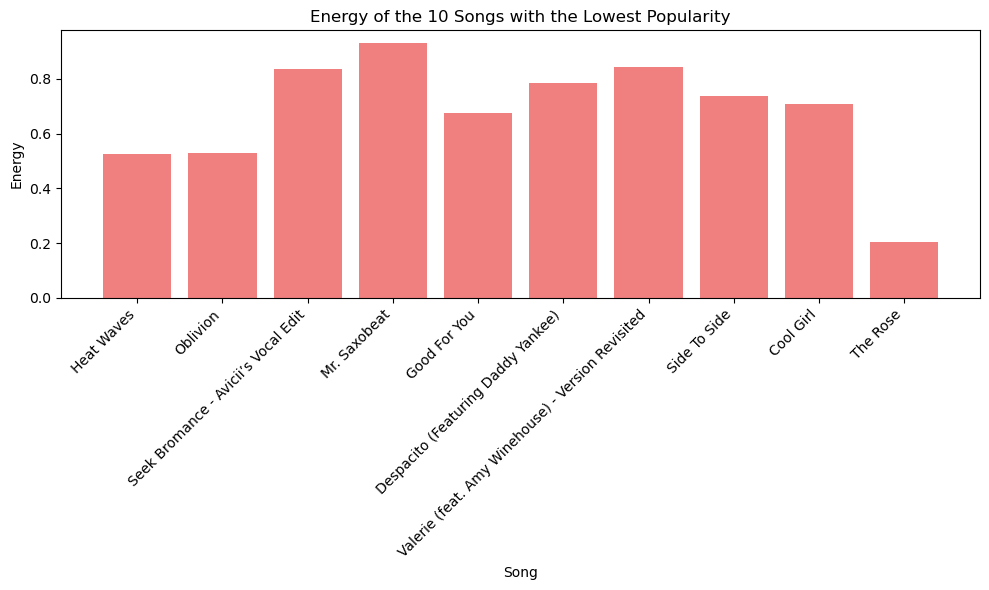

In [12]:
# Sort the dataset by popularity to get the songs with the lowest popularity
lowest_popularity_songs = data.sort_values(by='popularity').head(10)

# Select relevant columns (song name and energy)
lowest_popularity_songs_comparison = lowest_popularity_songs[['song', 'energy']]

# Plotting the comparison (vertical bar chart)
plt.figure(figsize=(10, 6))
plt.bar(lowest_popularity_songs_comparison['song'], lowest_popularity_songs_comparison['energy'], color='lightcoral')

# Add labels and title
plt.xlabel('Song')
plt.ylabel('Energy')
plt.title('Energy of the 10 Songs with the Lowest Popularity')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


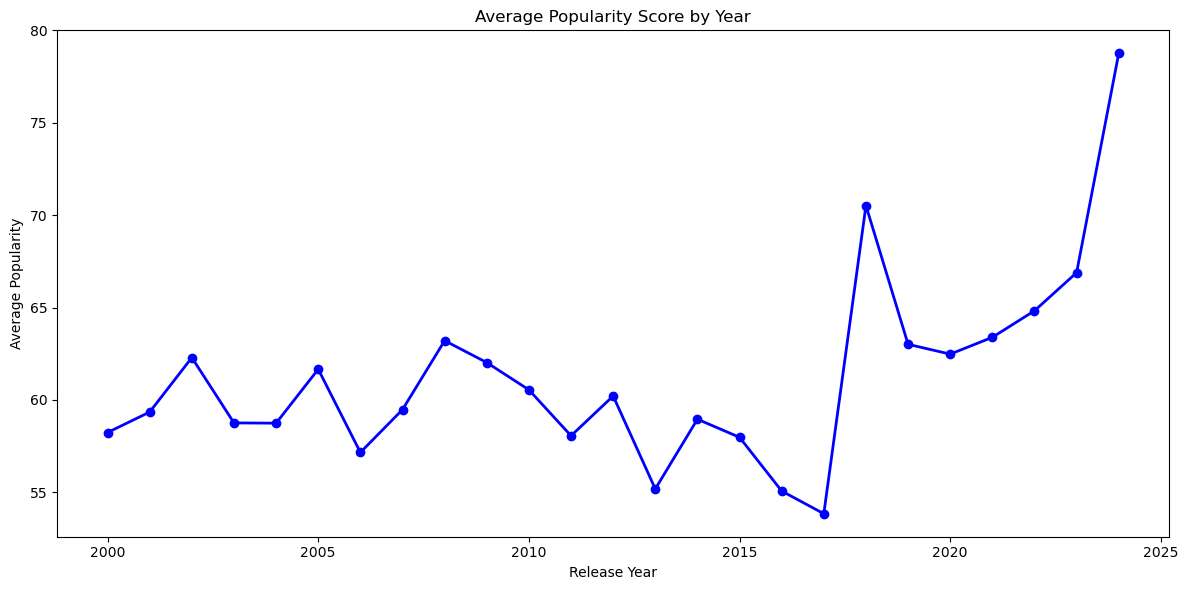

    release_year  popularity
0           2000   58.239437
1           2001   59.349057
2           2002   62.294118
3           2003   58.758242
4           2004   58.744681
5           2005   61.663366
6           2006   57.161290
7           2007   59.477778
8           2008   63.208791
9           2009   62.024390
10          2010   60.549020
11          2011   58.062500
12          2012   60.214286
13          2013   55.186047
14          2014   58.959184
15          2015   57.978022
16          2016   55.072917
17          2017   53.845455
18          2018   70.519231
19          2019   63.011236
20          2020   62.480769
21          2021   63.389831
22          2022   64.826087
23          2023   66.888889
24          2024   78.755556


In [13]:
# Group the data by release year and calculate the average popularity for each year
average_popularity_by_year = data.groupby('release_year')['popularity'].mean().reset_index()

# Plotting the average popularity by year
plt.figure(figsize=(12, 6))
plt.plot(average_popularity_by_year['release_year'], average_popularity_by_year['popularity'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity Score by Year')

# Display the plot
plt.tight_layout()
plt.show()

# Display the calculated average popularity for each year
print(average_popularity_by_year)


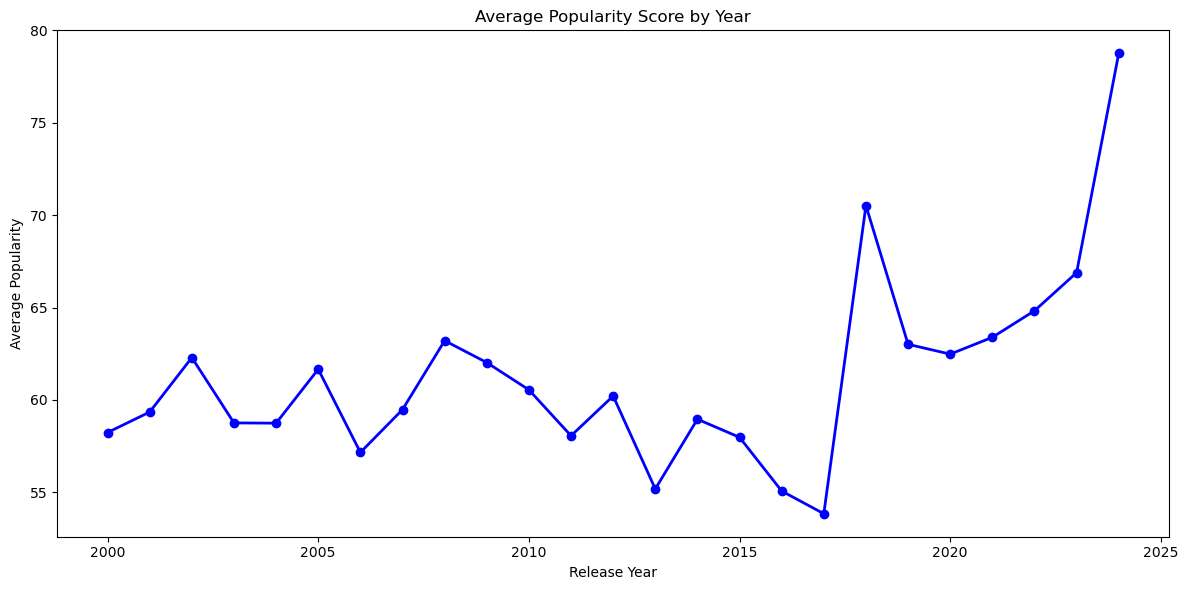

In [14]:
# Group the data by release year and calculate the average popularity for each year
average_popularity_by_year = data.groupby('release_year')['popularity'].mean().reset_index()

# Plotting the average popularity by year
plt.figure(figsize=(12, 6))
plt.plot(average_popularity_by_year['release_year'], average_popularity_by_year['popularity'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity Score by Year')

# Display the plot
plt.tight_layout()
plt.show()


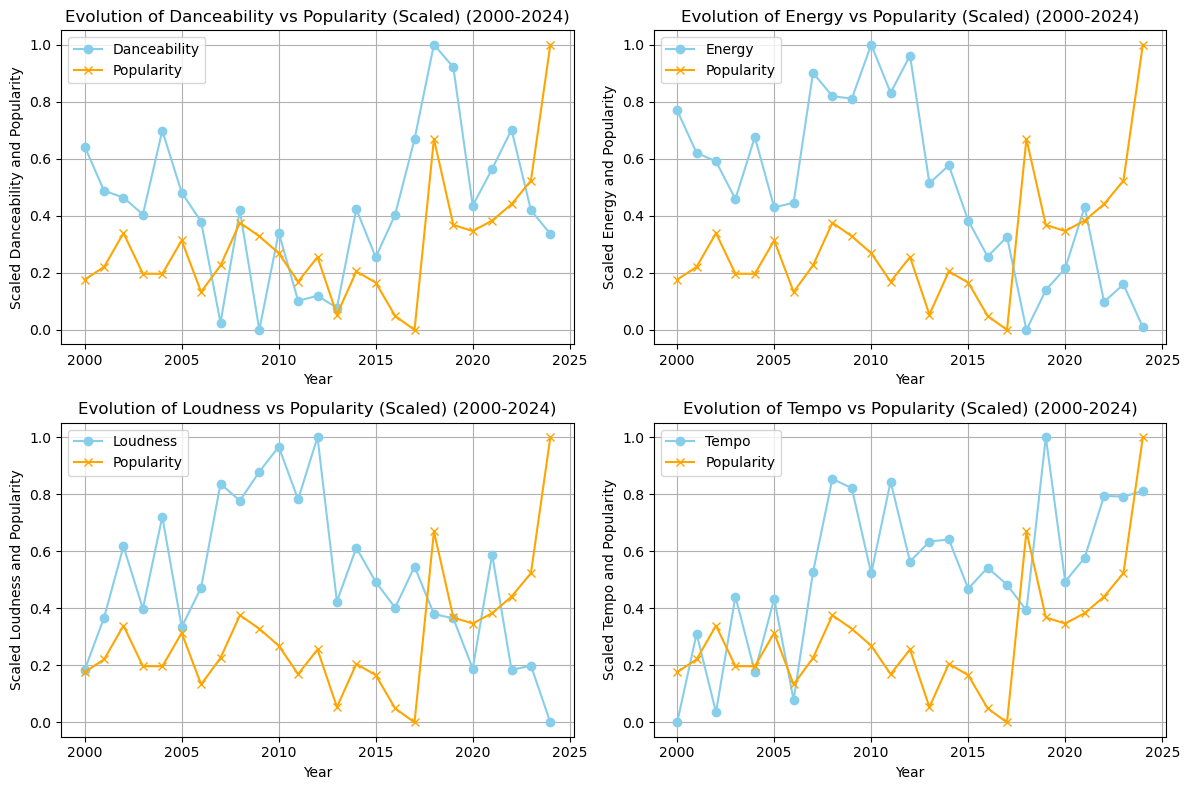

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Include 'popularity' in the attributes list
attributes = ['danceability', 'energy', 'loudness', 'tempo', 'popularity']

# Ensure all attributes are numeric
data[attributes] = data[attributes].apply(pd.to_numeric, errors='coerce')

# Calculate the mean for each attribute by year, including popularity
mean_by_year = data_filtered.groupby('release_year')[attributes].mean().reset_index()

# Scale the data to range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(mean_by_year[attributes])
scaled_data = pd.DataFrame(
    scaled_values,
    columns=attributes
)
scaled_data['release_year'] = mean_by_year['release_year']  # Add back the release_year column

# Plot the scaled evolution of attributes over time
plt.figure(figsize=(12, 8))

# Create subplots for each attribute (excluding popularity itself)
for i, attribute in enumerate(attributes[:-1], 1):  # Exclude 'popularity' from subplots
    plt.subplot(2, 2, i)
    plt.plot(scaled_data['release_year'], scaled_data[attribute], marker='o', label=attribute.capitalize(), color='skyblue')
    plt.plot(scaled_data['release_year'], scaled_data['popularity'], marker='x', label='Popularity', color='orange')
    plt.title(f'Evolution of {attribute.capitalize()} vs Popularity (Scaled) (2000-2024)')
    plt.xlabel('Year')
    plt.ylabel(f'Scaled {attribute.capitalize()} and Popularity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

# Display the plot
plt.tight_layout()
plt.show()